In [241]:
from http.client import HTTPConnection
import json
from PIL import Image
import io

# Stop Simulation

In [2]:
connection = HTTPConnection('127.0.0.1:5555')
connection.request('GET', '/stop')
response = connection.getresponse()
response.code

500

# FK & IK

In [339]:
connection = HTTPConnection('127.0.0.1:5555')
connection.request('GET', '/get_ee')
response = connection.getresponse()
text = response.read().decode('utf-8')
data = json.loads(text)
data

{'ee_position': [0.6320112231646556,
  -0.024741414609113214,
  0.3765814665874815,
  -3.1254780770496424,
  -0.0001858814050141877,
  1.5708914199540054],
 'target_position': [0.6,
  0.1,
  0.019892244579783818,
  8.56750423471147e-17,
  0.0,
  -1.152476478721322e-29]}

In [340]:
# target_position to ee_position
cmd = {"ee_position": data["target_position"][:]}
cmd["ee_position"][2] += 0.05
cmd

{'ee_position': [0.6,
  0.1,
  0.06989224457978382,
  8.56750423471147e-17,
  0.0,
  -1.152476478721322e-29]}

In [341]:
# ee_position 위치 변경
connection = HTTPConnection('127.0.0.1:5555')
headers = {'Content-type': 'application/json'}
connection.request('POST', '/set_ee', json.dumps(cmd), headers)
response = connection.getresponse()
response.code

200

# Manipulator Control

In [ ]:
# joints 위치 변경
connection = HTTPConnection('127.0.0.1:5555')
headers = {'Content-type': 'application/json'}
cmd = {
    "joints": [0,
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0]  # gripper
}
connection.request('POST', '/set_joints', json.dumps(cmd), headers)
response = connection.getresponse()
response.code

200

# Camera

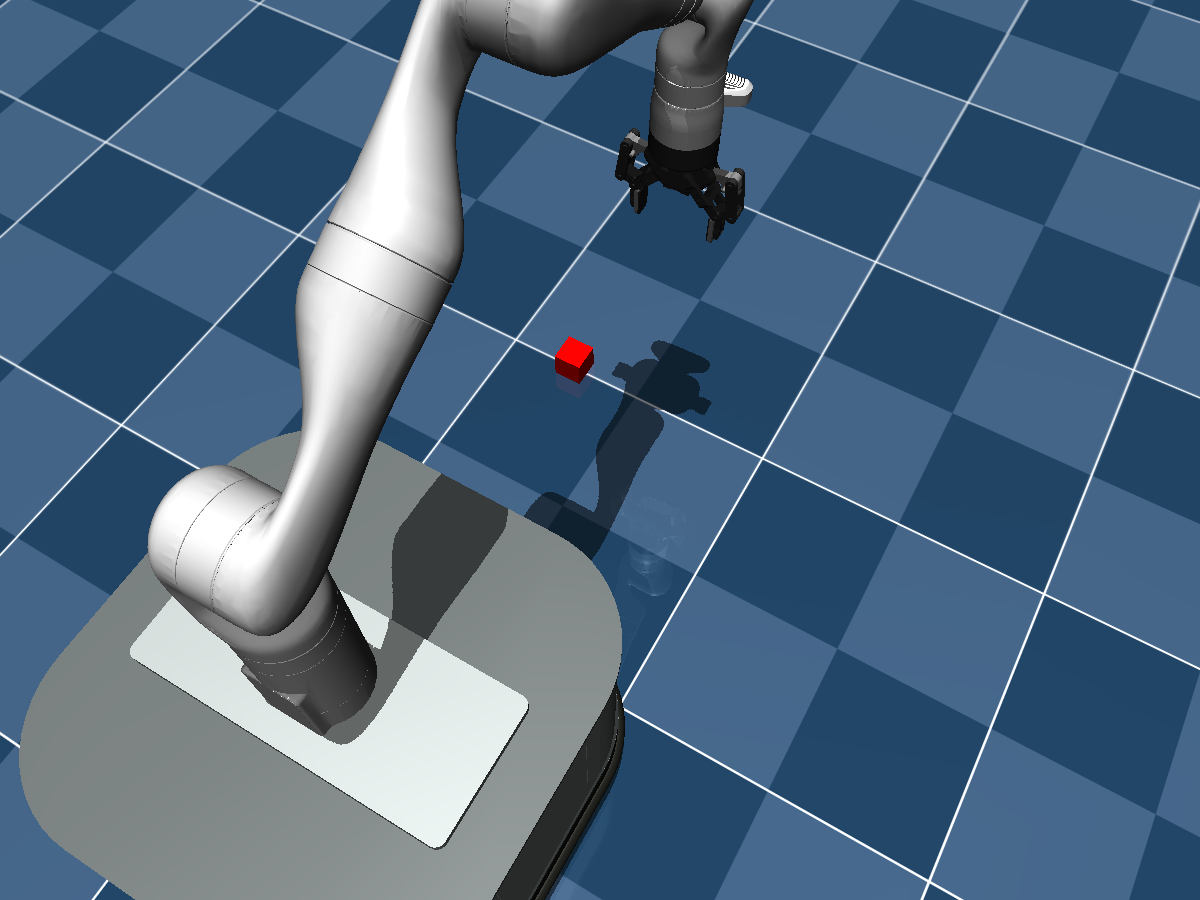

In [257]:
connection = HTTPConnection('127.0.0.1:5555')
connection.request('GET', '/capture')
response = connection.getresponse()
data = response.read()
img_io = io.BytesIO(data)
Image.open(img_io)